In [8]:
import requests
import json
import time
import pandas as pd
import numpy as np

In [9]:
dat=requests.get('https://api.covid19tracker.in/data/static/timeseries.min.json')
dat

<Response [200]>

In [10]:
data=json.loads(dat.content)

In [11]:
TT=data['TT']['dates']
for i in TT:
    del data['TT']['dates'][i]['delta']
    del data['TT']['dates'][i]['delta7']

KeyError: ignored

In [13]:
TT_dict = {}
for outerKey, innerDict in TT.items():
    for innerKey, values in innerDict.items():
        TT_dict[(outerKey,innerKey)] = values
        
TT_df = pd.DataFrame(TT_dict)
TT1=TT_df.T
TT1.head()

,,confirmed,deceased,recovered,vaccinated1,vaccinated2,vaccinatedpd,tested,other
2020-01-30,total,1,0,0,0,0,0,0,0
2020-02-02,total,2,0,0,0,0,0,0,0
2020-02-03,total,3,0,0,0,0,0,0,0
2020-02-14,total,3,0,3,0,0,0,0,0
2020-03-02,total,5,0,3,0,0,0,0,0


In [ ]:
TT1.tail()

,,confirmed,deceased,recovered,vaccinated1,vaccinated2,vaccinatedpd,tested,other
2022-08-04,total,44099494,527313,43424020,1013669618,925891090,99142477,881808467,13197
2022-08-05,total,44117906,527350,43443119,1013823472,926311969,101804345,882254181,13197
2022-08-06,total,44135119,527382,43460798,1013966372,926697971,104169238,882694654,13197
2022-08-07,total,44150240,527408,43475521,1014103840,927186382,106859639,883074539,13197
2022-08-08,total,44156176,527424,43483873,1014103840,927186382,106859639,883182319,13197


In [14]:
TT_con=TT1['confirmed']
TT_con=pd.DataFrame(TT_con)
TT_con.drop(['2020-01-30'],axis=0,inplace=True)
TT_con=TT_con.reset_index(drop=True)
TT_con.head()

,confirmed
0,2
1,3
2,3
3,5
4,6


In [15]:
TT_con.shape

(893, 1)

In [16]:
TT_con1=TT1.drop(['confirmed'],axis=1)
TT_con1=pd.DataFrame(TT_con1)
TT_con1=TT_con1.reset_index(drop=True)
TT_con1.tail()

,deceased,recovered,vaccinated1,vaccinated2,vaccinatedpd,tested,other
889,527313,43424020,1013669618,925891090,99142477,881808467,13197
890,527350,43443119,1013823472,926311969,101804345,882254181,13197
891,527382,43460798,1013966372,926697971,104169238,882694654,13197
892,527408,43475521,1014103840,927186382,106859639,883074539,13197
893,527424,43483873,1014103840,927186382,106859639,883182319,13197


In [17]:
TT_con1.shape

(894, 7)

In [18]:
TT3=[TT_con,TT_con1]
TT3=pd.concat(TT3,axis=1)
TT3.tail()

,confirmed,deceased,recovered,vaccinated1,vaccinated2,vaccinatedpd,tested,other
889,44117906.0,527313,43424020,1013669618,925891090,99142477,881808467,13197
890,44135119.0,527350,43443119,1013823472,926311969,101804345,882254181,13197
891,44150240.0,527382,43460798,1013966372,926697971,104169238,882694654,13197
892,44156176.0,527408,43475521,1014103840,927186382,106859639,883074539,13197
893,NaN,527424,43483873,1014103840,927186382,106859639,883182319,13197


In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics


In [21]:
TT3=TT3.iloc[0:893,:]
TT3.tail()

,confirmed,deceased,recovered,vaccinated1,vaccinated2,vaccinatedpd,tested,other
888,44099494.0,527284,43411846,1013463438,925299949,96288237,881520423,13197
889,44117906.0,527313,43424020,1013669618,925891090,99142477,881808467,13197
890,44135119.0,527350,43443119,1013823472,926311969,101804345,882254181,13197
891,44150240.0,527382,43460798,1013966372,926697971,104169238,882694654,13197
892,44156176.0,527408,43475521,1014103840,927186382,106859639,883074539,13197


## Training and Testing model

In [22]:
y=TT3['confirmed']
X=TT3.drop('confirmed',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,
													random_state=1)
X.head()

,deceased,recovered,vaccinated1,vaccinated2,vaccinatedpd,tested,other
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,3,0,0,0,0,0
4,0,3,0,0,0,0,0


## MSE, RSE, $R^2$ 



In [ ]:
import numpy as np
from sklearn import metrics

def print_evaluate (true , predicted ):
  mae = metrics . mean_absolute_error (true , predicted )
  mse = metrics . mean_squared_error (true , predicted )
  rmse = np. sqrt ( metrics . mean_squared_error (true , predicted ))
  r2_square = metrics . r2_score (true , predicted )
  print ('MAE :', mae)
  print ('MSE :', mse)
  print ('RMSE :', rmse )
  print ('R2 Square' , r2_square )
  print (' __________________________________ ')

def evaluate (true , predicted ):
  mae = metrics . mean_absolute_error (true , predicted )
  mse = metrics . mean_squared_error (true , predicted )
  rmse = np. sqrt ( metrics . mean_squared_error (true , predicted ))
  r2_square = metrics . r2_score (true , predicted )
  return mae , mse , rmse , r2_square

## Mutiple Linear Regression


In [ ]:
from sklearn . linear_model import LinearRegression
lin_reg = LinearRegression ( normalize = True )
lin_reg .fit( X_train , y_train )
test_pred = lin_reg . predict ( X_test )
train_pred = lin_reg . predict ( X_train )
print ('Test set evaluation :')
print_evaluate (y_test , test_pred )
print ('Train set evaluation :')
print_evaluate ( y_train , train_pred )
results_df = pd. DataFrame ( data =[[" Linear Regression ", * evaluate (y_test , test_pred ) ]],
columns =[ 'Model ', 'MAE ', 'MSE ', 'RMSE ', 'R2 Square '])

Test set evaluation :
MAE : 462014.2620962674
MSE : 405257650794.57965
RMSE : 636598.5004652302
R2 Square 0.9985298182390309
 __________________________________ 
Train set evaluation :
MAE : 458054.14846686664
MSE : 387397596907.4254
RMSE : 622412.722321311
R2 Square 0.9985563406824339
 __________________________________ 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge , RidgeCV
alphas = np. geomspace (1e-9, 5, num =100)
ridgecv = RidgeCV ( alphas = alphas , scoring = 'neg_mean_squared_error', normalize = True )
ridgecv .fit( X_train , y_train )
ridge = Ridge ( alpha = ridgecv . alpha_ , normalize = True )
ridge .fit ( X_train , y_train )
print ('Ridge Regression :')
print (" Alpha =", ridgecv . alpha_ )
test_pred = ridge.predict ( X_test )
train_pred = ridge.predict ( X_train )
print ('Test set evaluation : ')
print_evaluate (y_test , test_pred )
print ('Train set evaluation : ')
print_evaluate ( y_train , train_pred )
results_df_2 = pd. DataFrame ( data =[[" Ridge ", * evaluate (y_test ,test_pred )]],
columns =[ 'Model', 'MAE', 'MSE ', 'RMSE ', 'R2 Square '])
results_df = results_df . append ( results_df_2 , ignore_index = True )

Ridge Regression :
 Alpha = 1.0393101132501938e-05
Test set evaluation : 
MAE : 461982.5788602742
MSE : 405329623032.3484
RMSE : 636655.0267078305
R2 Square 0.998529557140268
 __________________________________ 
Train set evaluation : 
MAE : 457860.4345504201
MSE : 387403463219.1821
RMSE : 622417.4348611888
R2 Square 0.9985563188212874
 __________________________________ 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(

## LASSO 

In [ ]:
from sklearn . linear_model import Lasso , LassoCV
lasso = Lasso ( max_iter = 100000 , normalize = True )
lassocv = LassoCV ( alphas = None , cv = 10, max_iter = 100000 ,
normalize = True )
lassocv .fit( X_train , y_train )
lasso . set_params ( alpha = lassocv . alpha_ )
lasso .fit ( X_train , y_train )
test_pred = lasso.predict ( X_test )
train_pred = lasso.predict ( X_train )
print ('Test set evaluation')
print_evaluate (y_test , test_pred )
print ('Train set evaluation')
print_evaluate ( y_train , train_pred )
print (" Alpha =", lassocv . alpha_ )
results_df_3 = pd. DataFrame ( data =[[" Lasso ", * evaluate (y_test ,test_pred )]],
columns =[ 'Model ', 'MAE' , 'MSE ', 'RMSE','R2 Square' ])
results_df = results_df . append ( results_df_3 , ignore_index = True )

Test set evaluation
MAE : 513147.96417389833
MSE : 493711925843.1524
RMSE : 702646.3732512625
R2 Square 0.9982089264271152
 __________________________________ 
Train set evaluation
MAE : 482171.3952412103
MSE : 444532530987.37256
RMSE : 666732.7283007582
R2 Square 0.9983434240804686
 __________________________________ 
 Alpha = 593.9386148992704


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

## XGBRegressor

In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from numpy import loadtxt
from xgboost import XGBRegressor
model = XGBRegressor ()
model.fit( X_train , y_train )
test_pred = model . predict ( X_test )
train_pred = model . predict ( X_train )
print ('Test set evaluation:')
print_evaluate (y_test , test_pred )
print ('Train set evaluation:')
print_evaluate ( y_train , train_pred )
results_df_4 = pd. DataFrame ( data =[[" XGBRegressor ", * evaluate (y_test,test_pred ), 0]] ,
columns =[ 'Model', 'MAE','MSE', 'RMSE ','R2 Square', 'Cross Validation'])
results_df = results_df . append ( results_df_4 , ignore_index = True )

[20:26:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test set evaluation:
MAE : 69144.93739797108
MSE : 15243772100.092321
RMSE : 123465.67174762514
R2 Square 0.999944699092871
 __________________________________ 
Train set evaluation:
MAE : 38858.730605134224
MSE : 4651961664.490678
RMSE : 68205.2905901784
R2 Square 0.9999826641986024
 __________________________________ 


## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor ( n_estimators =1000)
rf_reg .fit( X_train , y_train )
test_pred = rf_reg . predict ( X_test )
train_pred = rf_reg . predict ( X_train )
print ('Test set evaluation')
print_evaluate (y_test , test_pred )
print ('Train set evaluation')
print_evaluate ( y_train , train_pred )
results_df_5 = pd. DataFrame ( data =[[" Random Forest Regressor ", *
evaluate (y_test , test_pred )]],
columns =[ 'Model','MAE','MSE','RMSE','R2 Square'])
results_df = results_df . append ( results_df_2 , ignore_index = True )

Test set evaluation
MAE : 17537.633199585533
MSE : 1626135351.3118086
RMSE : 40325.3685824669
R2 Square 0.9999941007541013
 __________________________________ 
Train set evaluation
MAE : 6446.159844141384
MSE : 259940587.71288806
RMSE : 16122.673094524
R2 Square 0.9999990313165222
 __________________________________ 


## Support Vector Machine Regressor (SVM Regressor or SVR)

In [ ]:
import csv

In [ ]:
dat=TT3.values
dat

array([[2.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.41351190e+07, 5.27350000e+05, 4.34431190e+07, ...,
        1.01804345e+08, 8.82254181e+08, 1.31970000e+04],
       [4.41502400e+07, 5.27382000e+05, 4.34607980e+07, ...,
        1.04169238e+08, 8.82694654e+08, 1.31970000e+04],
       [4.41561760e+07, 5.27408000e+05, 4.34755210e+07, ...,
        1.06859639e+08, 8.83074539e+08, 1.31970000e+04]])

In [ ]:
df=pd.DataFrame(dat)
df.columns=['confirmed','deceased','recovered','vaccinated1','vaccinated2','vaccinatedpd','tested','other']
df.head()

,confirmed,deceased,recovered,vaccinated1,vaccinated2,vaccinatedpd,tested,other
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
4,6.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y1=df['confirmed']
X1=df.drop('confirmed',axis=1)
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.15,
													random_state=1)

In [ ]:
from sklearn .svm import SVR
svm_reg = SVR( kernel ='rbf' , C =1000000 , epsilon =0.001)
svm_reg.fit( X1_train , y1_train.values.ravel() )
test_pred = svm_reg.predict ( X1_test )
train_pred =svm_reg.predict ( X1_train )
print ('Test set evaluation')
print_evaluate (y1_test , test_pred )
print ('Train set evaluation')
print_evaluate ( y1_train , train_pred )
results_df_3 = pd. DataFrame ( data =[["SVM Regressor ", * evaluate (y_test , test_pred )]],
                              columns =[ 'Model','MAE','MSE','RMSE','R2 Square'])
results_df = results_df . append ( results_df_3 , ignore_index = True )

Test set evaluation
MAE : 888955.6856688834
MSE : 1600075370953.6003
RMSE : 1264940.856701846
R2 Square 0.9941952937299529
 __________________________________ 
Train set evaluation
MAE : 1092267.1196048341
MSE : 2215579516414.0806
RMSE : 1488482.2862278477
R2 Square 0.9917435161234516
 __________________________________ 


## ANN

In [ ]:
import keras
import tensorflow
import sklearn
from sklearn.preprocessing import normalize
from keras.models import Sequential

from keras.utils import np_utils

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input , Dense , Activation , Dropout
from tensorflow.keras.optimizers import Adam
X_train =np.array( X_train )
X_test =np.array( X_test )
y_train =np.array ( y_train )
y_test = np.array ( y_test )
model =Sequential()
model.add( Dense ( X_train . shape [1] , activation ='relu'))
model.add( Dense (32 , activation ='relu'))
# model .add( Dropout (0.2) )
model.add( Dense (64 , activation ='relu'))
# model .add( Dropout (0.2) )
model.add( Dense (128 , activation ='relu'))
model.add( Dropout (0.2) )
model.add ( Dense (1))
model.compile ( optimizer = Adam (0.001) , loss ='mse')
r = model.fit( X_train , y_train , validation_data =( X_test , y_test ), batch_size =128 , epochs =50)
test_pred = model.predict ( X_test )
train_pred = model.predict ( X_train )
print ('Test set evaluation')
print_evaluate(y_test , test_pred )
print('Train set evaluation')
print_evaluate ( y_train , train_pred )
results_df_4 = pd. DataFrame ( data =[[" Artficial Neural Network ", *evaluate (y_test , test_pred )]],columns =[ 'Model','MAE','MSE','RMSE','R2 Square'])
results_df = results_df . append ( results_df_4 , ignore_index = True )

Epoch 1/50
6/6 [==============================] - 1s 36ms/step - loss: 2636363400740864.0000 - val_loss: 962809663848448.0000
Epoch 2/50
6/6 [==============================] - 0s 7ms/step - loss: 995724414156800.0000 - val_loss: 559867207090176.0000
Epoch 3/50
6/6 [==============================] - 0s 6ms/step - loss: 1171234091958272.0000 - val_loss: 28865579712512.0000
Epoch 4/50
6/6 [==============================] - 0s 7ms/step - loss: 645935029813248.0000 - val_loss: 84628958347264.0000
Epoch 5/50
6/6 [==============================] - 0s 7ms/step - loss: 519103437602816.0000 - val_loss: 61035130126336.0000
Epoch 6/50
6/6 [==============================] - 0s 8ms/step - loss: 430371258761216.0000 - val_loss: 20761379078144.0000
Epoch 7/50
6/6 [==============================] - 0s 7ms/step - loss: 401357244727296.0000 - val_loss: 8877977370624.0000
Epoch 8/50
6/6 [==============================] - 0s 6ms/step - loss: 320294635962368.0000 - val_loss: 21349676351488.0000
Epoch 9/50
6

## Polynomial Regression

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
poly_reg.fit(X_train)
X_train_poly=poly_reg.transform(X_train)
X_test_poly=poly_reg.transform(X_test)
lr=LinearRegression()
lr.fit(X_train_poly,y_train)
test_pred = lr . predict ( X_test_poly )
train_pred = lr. predict ( X_train_poly )
print ('Test set evaluation :')
print_evaluate (y_test , test_pred )
print ('Train set evaluation :')
print_evaluate ( y_train , train_pred )
results_df = pd. DataFrame ( data =[[" Linear Regression ", * evaluate (y_test , test_pred ) ]],
                            columns =[ 'Model ', 'MAE ', 'MSE ', 'RMSE ', 'R2 Square '])


Test set evaluation :
MAE : 42463.40361447979
MSE : 3553557166.3450546
RMSE : 59611.72004182613
R2 Square 0.9999871085100497
 __________________________________ 
Train set evaluation :
MAE : 40161.57974818217
MSE : 2804128369.2051716
RMSE : 52954.02127511348
R2 Square 0.9999895502551379
 __________________________________ 


## Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
Dtreg=DecisionTreeRegressor()
Dtreg.fit(X_train,y_train)
test_pred = Dtreg . predict ( X_test )
train_pred = Dtreg . predict ( X_train )
print ('Test set evaluation')
print_evaluate (y_test , test_pred )
print ('Train set evaluation')
print_evaluate ( y_train , train_pred )
results_df_5 = pd. DataFrame ( data =[[" Random Forest Regressor ", *
evaluate (y_test , test_pred )]],
columns =[ 'Model','MAE','MSE','RMSE','R2 Square'])
results_df = results_df . append ( results_df_2 , ignore_index = True )

Test set evaluation
MAE : 51091.33395522388
MSE : 9150661038.491138
RMSE : 95659.08758968559
R2 Square 0.9999668035015916
 __________________________________ 
Train set evaluation
MAE : 1.1725955204216074
MSE : 78.21953227931489
RMSE : 8.844180701416887
R2 Square 0.9999999999997085
 __________________________________ 


## Model Prediction

**Multiple Linear Regression**<br>
Test set evaluation :
MAE : 476656.6476372652
MSE : 408208327989.20844
RMSE : 638911.8311545094
R2 Square 0.9985305516843499
 __________________________________ 
Train set evaluation :
MAE : 462691.1864725913
MSE : 387140519204.21027
RMSE : 622206.1709788889
R2 Square 0.9985542257319765<br>
<br>
**Ridge Regression**<br>
Alpha = 1e-09
Test set evaluation : 
MAE : 1.1291220529285904
MSE : 4.950449813519245
RMSE : 2.2249606319032353
R2 Square 0.9999999999999999
 __________________________________ 
Train set evaluation : 
MAE : 1.2033985217789442
MSE : 5.737132252014866
RMSE : 2.395231147930167
R2 Square 0.9999999999999999<br>
<br>
**LASSO**<br>
MAE : 507135.7184641747
MSE : 471478228628.448
RMSE : 686642.7226938679
R2 Square 0.9983027957995455
 __________________________________ 
Train set evaluation
MAE : 485208.61331868626
MSE : 443942541411.6576
RMSE : 666290.1330589082
R2 Square 0.9983420988736253<br><br>
**XGBRegressor**<br>
Test set evaluation:
MAE : 64061.80819292211
MSE : 14687062760.623432
RMSE : 121190.19251005187
R2 Square 0.9999471302319045
 __________________________________ 
Train set evaluation:
MAE : 39900.43189829321
MSE : 5103758752.056089
RMSE : 71440.59596655174
R2 Square 0.9999809400393194<br><br>
**Random Forest Regressor**<br>
Test set evaluation
MAE : 18339.307475004534
MSE : 3649078644.963532
RMSE : 60407.60419817634
R2 Square 0.9999868642256886
 __________________________________ 
Train set evaluation
MAE : 6760.968449978019
MSE : 284885996.1037614
RMSE : 16878.566174404787
R2 Square 0.99999893609472<br><br>
**SVM**<br>
Test set evaluation
MAE : 945217.9331997777
MSE : 1850277001791.812
RMSE : 1360248.8749459828
R2 Square 0.993339463608785
 __________________________________ 
Train set evaluation
MAE : 1087892.816648811
MSE : 2251676941148.321
RMSE : 1500558.8762685459
R2 Square 0.9915911241011254<br><br>
**ANN**<br>
Test set evaluation
MAE : 750113.5246198568
MSE : 997647250229.2828
RMSE : 998822.9323705393
R2 Square 0.9964087183652433
 __________________________________ 
Train set evaluation
MAE : 740675.6855421948
MSE : 984748219152.9869
RMSE : 992344.8085987989
R2 Square 0.9963224628652668<br><br>
**Polynomial Regression**<br>
Test set evaluation :
MAE : 70397.97096138609
MSE : 10406992599.610182
RMSE : 102014.66855119503
R2 Square 0.999962537418524
 __________________________________ 
Train set evaluation :
MAE : 67388.5652988519
MSE : 8202395082.960037
RMSE : 90567.07504915922
R2 Square 0.9999693681979569<br><br>
**Decision Tree Prediction**<br>
Test set evaluation
MAE : 50282.75932835821
MSE : 12493790805.349346
RMSE : 111775.62706310059
R2 Square 0.9999550254647046
 __________________________________ 
Train set evaluation
MAE : 1.1741424802110818
MSE : 78.32272427440633
RMSE : 8.850012670861343
R2 Square 0.9999999999997075




## Settings of individuals columns into dataframe

In [ ]:
TT_confirmed=[]
for i in range (len(TT1['confirmed'])):
    X=TT1['confirmed'][i] - TT1['confirmed'][i-1]
    TT_confirmed.append(X)
TT_confirmed.remove(-44156175)
print(type(TT_confirmed))
TT_confirmed1=pd.DataFrame(TT_confirmed)
#AR_confirmed1.shape
TT_confirmed1.columns=['Dailyconfirmed']
TT_confirmed1.head()

<class 'list'>


,Dailyconfirmed
0,1
1,1
2,0
3,2
4,1


In [ ]:
TT_deceased=[]
for i in range (len(TT1['deceased'])):
    X=TT1['deceased'][i] - TT1['deceased'][i-1]
    TT_deceased.append(X)
TT_deceased.remove(-527424)
print(type(TT_deceased))
TT_deceased1=pd.DataFrame(TT_deceased)
TT_deceased1.columns=['Dailydeceased']
TT_deceased1.head()

<class 'list'>


,Dailydeceased
0,0
1,0
2,0
3,0
4,0


In [ ]:
TT_recovered=[]
for i in range (len(TT1['recovered'])):
    X=TT1['recovered'][i] - TT1['recovered'][i-1]
    TT_recovered.append(X)
TT_recovered.remove(-43483873)
print(type(TT_recovered))
TT_recovered1=pd.DataFrame(TT_recovered)
TT_recovered1.columns=['Dailyrecovered']
TT_recovered1.head()

<class 'list'>


,Dailyrecovered
0,0
1,0
2,3
3,0
4,0


In [ ]:
TT_vaccinated1=[]
for i in range (len(TT1['vaccinated1'])):
    X=TT1['vaccinated1'][i] - TT1['vaccinated1'][i-1]
    TT_vaccinated1.append(X)
TT_vaccinated1.remove(-1014103840)
print(type(TT_vaccinated1))
TT_vaccinated11=pd.DataFrame(TT_vaccinated1)
#AR_vaccinated11.shape
TT_vaccinated11.columns=['Dailyvaccianted1']
TT_vaccinated11.head()

<class 'list'>


,Dailyvaccianted1
0,0
1,0
2,0
3,0
4,0


In [ ]:
TT_vaccinated2=[]
for i in range (len(TT1['vaccinated2'])):
    X=TT1['vaccinated2'][i] - TT1['vaccinated2'][i-1]
    TT_vaccinated2.append(X)
TT_vaccinated2.remove(-927186382)
print(type(TT_vaccinated2))
TT_vaccinated21=pd.DataFrame(TT_vaccinated2)
#AR_vaccinated21.shape
TT_vaccinated21.columns=['Dailyvaccinated']
TT_vaccinated21.head()

<class 'list'>


,Dailyvaccinated
0,0
1,0
2,0
3,0
4,0


In [ ]:
TT_vaccinatedpd=[]
for i in range (len(TT1['vaccinatedpd'])):
    X=TT1['vaccinatedpd'][i] - TT1['vaccinatedpd'][i-1]
    TT_vaccinatedpd.append(X)
TT_vaccinatedpd.remove(-106859639)
print(type(TT_vaccinatedpd))
TT_vaccinatedpd1=pd.DataFrame(TT_vaccinatedpd)
#AR_vaccinated21.shape
TT_vaccinatedpd1.columns=['Dailyvaccinated']
TT_vaccinatedpd1.head()

<class 'list'>


,Dailyvaccinated
0,0
1,0
2,0
3,0
4,0


In [ ]:
TT_tested=[]
for i in range (len(TT1['tested'])):
    X=TT1['tested'][i] - TT1['tested'][i-1]
    TT_tested.append(X)
TT_tested.remove(-883182319)
print(type(TT_tested))
TT_tested1=pd.DataFrame(TT_tested)
#AR_tested.shape
TT_tested1.columns=['Dailytested']
TT_tested1.head()

<class 'list'>


,Dailytested
0,0
1,0
2,0
3,0
4,0


In [ ]:
TT_other=[]
for i in range (len(TT1['other'])):
    X=TT1['other'][i] - TT1['other'][i-1]
    TT_other.append(X)
print(type(TT_other))
TT_other.remove(-13197)
TT_other1=pd.DataFrame(TT_other)
#AR_tested.shape
TT_other1.columns=['Dailytested']
TT_other1.head()

<class 'list'>


,Dailytested
0,0
1,0
2,0
3,0
4,0


## Exploratory Data Analysis

In [ ]:
TT3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   confirmed     893 non-null    float64
 1   deceased      893 non-null    int64  
 2   recovered     893 non-null    int64  
 3   vaccinated1   893 non-null    int64  
 4   vaccinated2   893 non-null    int64  
 5   vaccinatedpd  893 non-null    int64  
 6   tested        893 non-null    int64  
 7   other         893 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 55.9 KB


In [ ]:
TT3.dtypes

confirmed       float64
deceased          int64
recovered         int64
vaccinated1       int64
vaccinated2       int64
vaccinatedpd      int64
tested            int64
other             int64
dtype: object

In [ ]:
TT3.shape

(893, 8)

In [ ]:
TT3.describe()

,confirmed,deceased,recovered,vaccinated1,vaccinated2,vaccinatedpd,tested,other
count,8.930000e+02,893.000000,8.930000e+02,8.930000e+02,8.930000e+02,8.930000e+02,8.930000e+02,893.000000
mean,2.198080e+07,281549.377380,2.116094e+07,3.795163e+08,2.601232e+08,7.393481e+06,4.041384e+08,7556.499440
std,1.642687e+07,200502.330783,1.625361e+07,4.162813e+08,3.466381e+08,1.675433e+07,3.202669e+08,5660.038529
min,2.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,6.903791e+06,105554.000000,5.824468e+06,0.000000e+00,0.000000e+00,0.000000e+00,9.039372e+07,1040.000000
50%,2.577153e+07,283280.000000,2.197990e+07,1.418802e+08,4.080950e+07,0.000000e+00,3.522274e+08,10428.000000
75%,3.480928e+07,480100.000000,3.423423e+07,8.347242e+08,5.825286e+08,0.000000e+00,7.211467e+08,13197.000000
max,4.415618e+07,527408.000000,4.347552e+07,1.014104e+09,9.271864e+08,1.068596e+08,8.830745e+08,13197.000000


In [ ]:
import matplotlib.pyplot as pyp
import seaborn as sns

### Boxplot

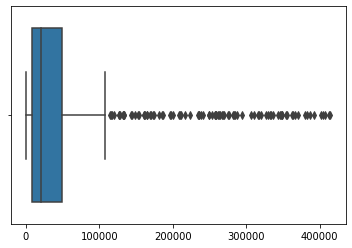

In [ ]:
sns.boxplot(x=TT_confirmed)

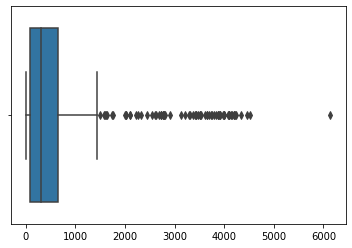

In [ ]:
sns.boxplot(x=TT_deceased)

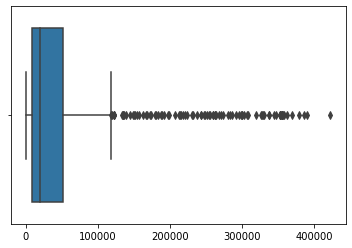

In [ ]:
sns.boxplot(x=TT_recovered)

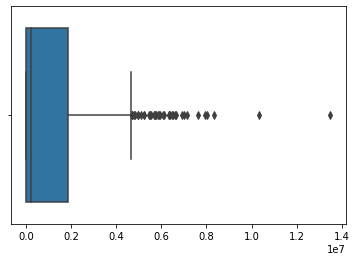

In [ ]:
sns.boxplot(x=TT_vaccinated1)

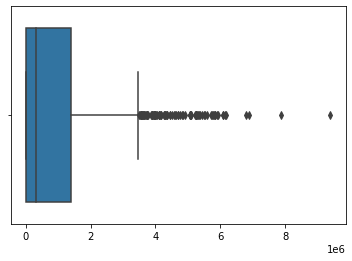

In [ ]:
sns.boxplot(x=TT_vaccinated2)

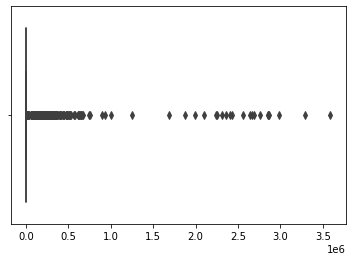

In [ ]:
sns.boxplot(x=TT_vaccinatedpd)

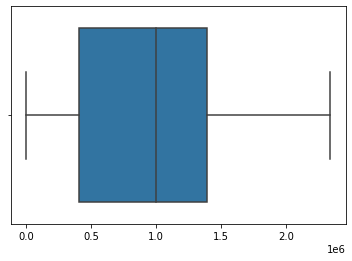

In [ ]:
sns.boxplot(x=TT_tested)

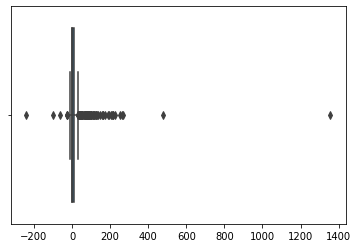

In [ ]:
sns.boxplot(x=TT_other)

### Heatmap

,confirmed,deceased,recovered,vaccinated1,vaccinated2,vaccinatedpd,tested,other
confirmed,1.000000,0.995124,0.998871,0.936947,0.850295,0.574137,0.988025,0.976931
deceased,0.995124,1.000000,0.995534,0.928637,0.823994,0.529006,0.983131,0.982526
recovered,0.998871,0.995534,1.000000,0.943908,0.859141,0.583291,0.990456,0.973026
vaccinated1,0.936947,0.928637,0.943908,1.000000,0.956198,0.654365,0.969858,0.874195
vaccinated2,0.850295,0.823994,0.859141,0.956198,1.000000,0.780065,0.903344,0.739184
vaccinatedpd,0.574137,0.529006,0.583291,0.654365,0.780065,1.000000,0.620206,0.440257
tested,0.988025,0.983131,0.990456,0.969858,0.903344,0.620206,1.000000,0.950649
other,0.976931,0.982526,0.973026,0.874195,0.739184,0.440257,0.950649,1.000000


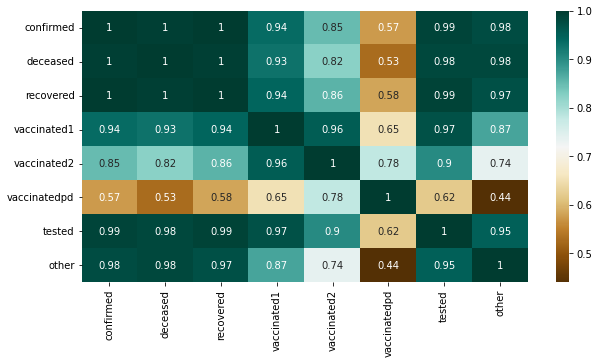

In [ ]:
plt.figure(figsize=(10,5))
c= TT3.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

### Histogram

(array([599., 167.,  40.,  17.,  10.,  10.,  19.,   8.,  14.,   9.]),
 array([     0.,  41428.,  82856., 124284., 165712., 207140., 248568.,
        289996., 331424., 372852., 414280.]),
 <a list of 10 Patch objects>)

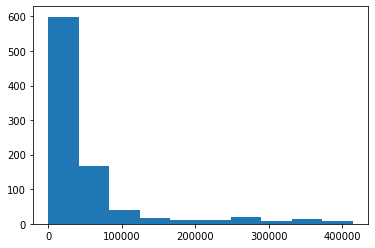

In [ ]:
plt.hist(TT_confirmed)

(array([659., 155.,  15.,   9.,  12.,  15.,  24.,   3.,   0.,   1.]),
 array([   0. ,  613.9, 1227.8, 1841.7, 2455.6, 3069.5, 3683.4, 4297.3,
        4911.2, 5525.1, 6139. ]),
 <a list of 10 Patch objects>)

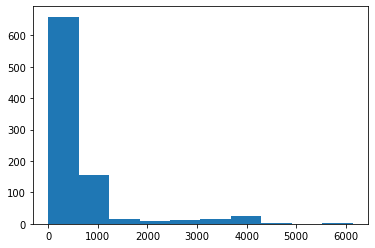

In [ ]:
plt.hist(TT_deceased)

(array([625., 153.,  31.,  14.,  11.,  14.,  15.,  13.,  14.,   3.]),
 array([     0. ,  42239.1,  84478.2, 126717.3, 168956.4, 211195.5,
        253434.6, 295673.7, 337912.8, 380151.9, 422391. ]),
 <a list of 10 Patch objects>)

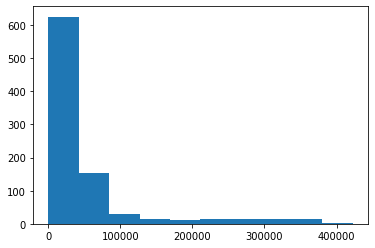

In [ ]:
plt.hist(TT_recovered)

(array([612., 136.,  81.,  36.,  19.,   6.,   1.,   1.,   0.,   1.]),
 array([       0. ,  1348489.3,  2696978.6,  4045467.9,  5393957.2,
         6742446.5,  8090935.8,  9439425.1, 10787914.4, 12136403.7,
        13484893. ]),
 <a list of 10 Patch objects>)

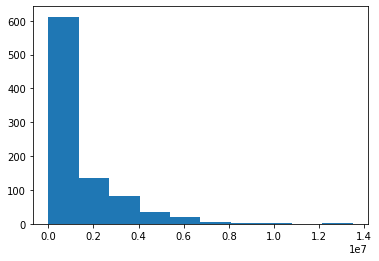

In [ ]:
plt.hist(TT_vaccinated1)

(array([581., 139.,  52.,  47.,  37.,  21.,  12.,   2.,   1.,   1.]),
 array([      0. ,  939801.8, 1879603.6, 2819405.4, 3759207.2, 4699009. ,
        5638810.8, 6578612.6, 7518414.4, 8458216.2, 9398018. ]),
 <a list of 10 Patch objects>)

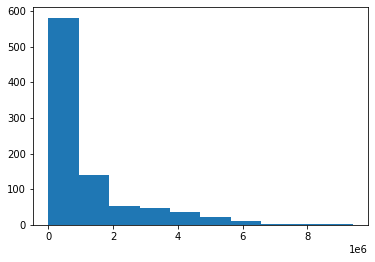

In [ ]:
plt.hist(TT_vaccinated2)

(array([820.,  46.,   5.,   1.,   1.,   3.,   6.,   8.,   1.,   2.]),
 array([      0. ,  358907.6,  717815.2, 1076722.8, 1435630.4, 1794538. ,
        2153445.6, 2512353.2, 2871260.8, 3230168.4, 3589076. ]),
 <a list of 10 Patch objects>)

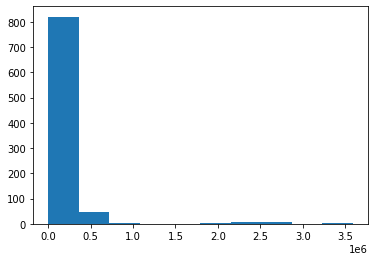

In [ ]:
plt.hist(TT_vaccinatedpd)

(array([126., 134.,  66.,  95., 146., 106.,  34.,  52.,  87.,  47.]),
 array([      0. ,  234108.6,  468217.2,  702325.8,  936434.4, 1170543. ,
        1404651.6, 1638760.2, 1872868.8, 2106977.4, 2341086. ]),
 <a list of 10 Patch objects>)

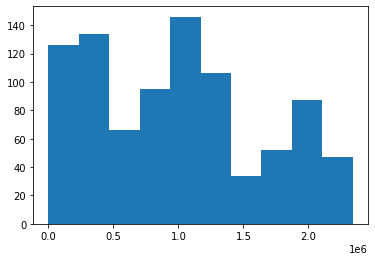

In [ ]:
plt.hist(TT_tested)

(array([  2., 848.,  38.,   3.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([-242. ,  -82.2,   77.6,  237.4,  397.2,  557. ,  716.8,  876.6,
        1036.4, 1196.2, 1356. ]),
 <a list of 10 Patch objects>)

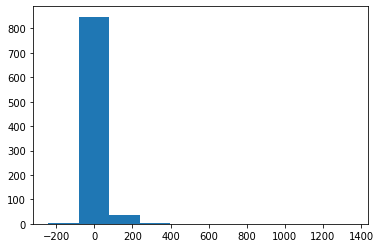

In [ ]:
plt.hist(TT_other)